# PCA, Eigenvalue Decomposition, SVD
> not done

- toc:true
- branch: master
- badges: true
- comments: false
- author: 최서연
- categories: [PCA, Eigenvalue Decomposition, SVD]

ref: https://blog.clairvoyantsoft.com/eigen-decomposition-and-pca-c50f4ca15501

## PCA: Principle Components Analysis

#### the goal of PCA

- We see that data almost always comes with **information, redundancy, and noise**. 
- We always aim to **extract the maximum possible information from** the data while **reducing the noise and ignoring the redundant information**.

#### PCA can be used when we want to:

1. Reduce the number of features but cannot identify the unimportant ones that can be ignored
2. Ensure that the features of the data are independent of one another even if the features become less interpretable

#### How PCA uses this concept of eigendecomposition?

- we have a dataset with ‘n’ predictor variables.
- We center the predictors to their respective means and then get an n x n covariance matrix.
- This covariance matrix is then decomposed into eigenvalues and eigenvectors.

Covariance matrix (= dispersion matrix or variance-covariance matrix) is a matrix whose element in the i,j position is the covariance between the i-th and j-th element (feature) of a random vector (A random vector is a random variable with multiple dimensions).

$$C=\begin{bmatrix}{cov(x,x)}&{cov(x,y)}\\{cov(x,y)}&{cov(y,y)}\end{bmatrix}$$ $$=\begin{bmatrix}{\frac{1}{n}\sum(x_i-m_x)^2}&{\frac{1}{n}\sum(x_i-m_x)(y_i-m_y)}\\{\frac{1}{n}\sum(x_i-m_x)(y_i-m_y)}&{\frac{1}{n}\sum(y_i-m_y)^2}\end{bmatrix}$$

##### the properties of covariance and a covariance matrix

1. Covariance of a random variable (a predictor) with itself is simply its variance
2. Each element on the principal diagonal of a covariance matrix shows the variances of each of the random variables
3. Every covariance matrix is symmetric

- So, a covariance matrix has variances (covariance of a predictor with itself) and covariances (between predictors).
- Eigenvectors are unit vectors with length or magnitude equal to 1. They are often referred to as right vectors, which simply means a column vector.

##### Method of PCA

1. Measures how each variable is associated with one another using a Covariance matrix
2. Understands the directions of the spread of our data using Eigenvectors
3. Brings out the relative importance of these directions using Eigenvalues

--------------------------------------------------

ref: https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

#### PCA For Data Visualization

load iris dataset

In [49]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
df

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Standardize the Data

- Use StandardScaler to help you standardize the dataset’s features onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms.

In [50]:
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']

In [51]:
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values

In [52]:
# Standardizing the features
x = StandardScaler().fit_transform(x)

PCA Projection to 2D

- In this section, the code projects the original data which is 4 dimensional into 2 dimensions.

In [53]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [54]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

Visualize 2D Projection

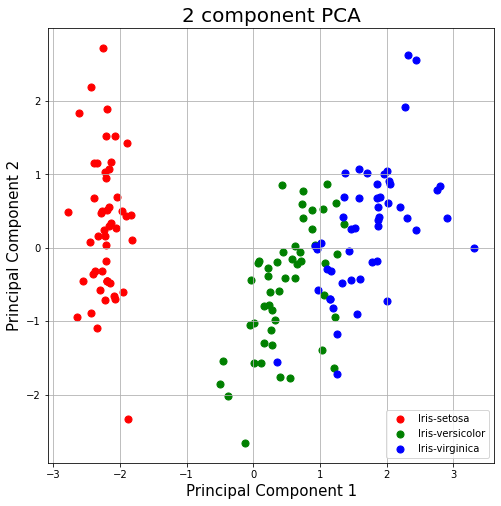

In [55]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

- The explained variance tells you how much information (variance) can be attributed to each of the principal components.
- This is important as while you can convert 4 dimensional space to 2 dimensional space, you lose some of the variance (information) when you do this.

In [56]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

- Together, the two components contain 95.80% of the information.

PCA to Speed-up Machine Learning Algorithms

- The MNIST database of handwritten digits is more suitable as it has 784 feature columns (784 dimensions), a training set of 60,000 examples, and a test set of 10,000 examples.

load data

In [57]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

- **The images that you downloaded are contained in mnist.data and has a shape of (70000, 784) meaning there are 70,000 images with 784 dimensions (784 features).**
- The labels (the integers 0–9) are contained in mnist.target. The features are 784 dimensional (28 x 28 images) and the labels are simply numbers from 0–9.

Split Data into Training and Test Sets

In [58]:
from sklearn.model_selection import train_test_split
# test_size: what proportion of original data is used for test set
train_img, test_img, train_lbl, test_lbl = train_test_split( mnist.data, mnist.target, test_size=1/7.0, random_state=0)

Standardize the Data

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(train_img)
# Apply transform to both the training set and the test set.
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

Import and Apply PCA

In [60]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)

- .95 means that scikit-learn choose the minimum number of principal components such that 95% of the variance is retained.

> note: you are fitting PCA on the training set only.

In [61]:
pca.fit(train_img)

PCA(n_components=0.95)

> note: You can find out how many components PCA choose after fitting the model using pca.n_components_ . In this case, 95% of the variance amounts to 330 principal components.

Apply the mapping (transform) to both the training set and the test set.

In [62]:
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

Apply Logistic Regression to the Transformed Data

Step 1: Import the model you want to use

In [63]:
from sklearn.linear_model import LogisticRegression

Step 2: Make an instance of the Model.

In [64]:
# all parameters not specified are set to their defaults
# default solver is incredibly slow which is why it was changed to 'lbfgs'
logisticRegr = LogisticRegression(solver = 'lbfgs')

Step 3: Training the model on the data, storing the information learned from the data

In [65]:
logisticRegr.fit(train_img, train_lbl)

/home/csy/anaconda3/envs/csy/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Step 4: Predict the labels of new data (new images)

In [66]:
# Predict for One Observation (image)
logisticRegr.predict(test_img[0].reshape(1,-1))

array(['0'], dtype=object)

In [67]:
# Predict for One Observation (image)
logisticRegr.predict(test_img[0:10])

array(['0', '4', '1', '2', '4', '7', '7', '1', '1', '7'], dtype=object)

Measuring Model Performance

In [68]:
logisticRegr.score(test_img, test_lbl)

0.9201

- While accuracy is not always the best metric for machine learning algorithms (precision, recall, F1 Score, ROC Curve, etc would be better), it is used here for simplicity.

-------------------------------------------

ref: https://sebastianraschka.com/Articles/2015_pca_in_3_steps.html

load data

In [75]:
import pandas as pd

df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    header=None,
    sep=',')

df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.dropna(how="all", inplace=True) # drops the empty line at file-end

df.tail()

,sepal_len,sepal_wid,petal_len,petal_wid,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [76]:
# split data table into data X and class labels y

X = df.iloc[:,0:4].values
y = df.iloc[:,4].values

$$X^T=\begin{pmatrix}{x_1}\\{x_2}\\{x_3}\\{x_4}\end{pmatrix} = \begin{pmatrix}{sepal length}\\{sepal width}\\{petal length}\\{peral width}\end{pmatrix}$$

Exploratory Visualization

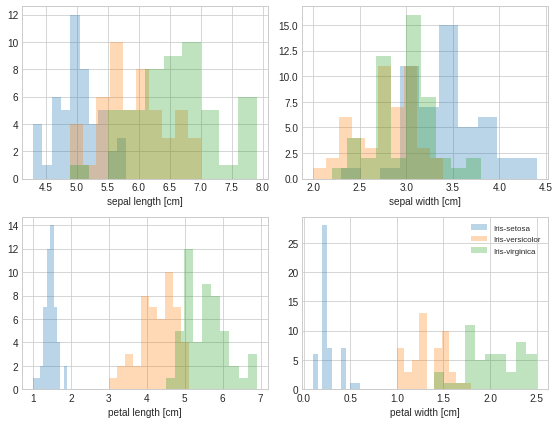

In [77]:
from matplotlib import pyplot as plt
import numpy as np
import math

label_dict = {1: 'Iris-Setosa',
              2: 'Iris-Versicolor',
              3: 'Iris-Virgnica'}

feature_dict = {0: 'sepal length [cm]',
                1: 'sepal width [cm]',
                2: 'petal length [cm]',
                3: 'petal width [cm]'}

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8, 6))
    for cnt in range(4):
        plt.subplot(2, 2, cnt+1)
        for lab in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'):
            plt.hist(X[y==lab, cnt],
                     label=lab,
                     bins=10,
                     alpha=0.3,)
        plt.xlabel(feature_dict[cnt])
    plt.legend(loc='upper right', fancybox=True, fontsize=8)

    plt.tight_layout()
    plt.show()

Standardizing

In [78]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

1 - Eigendecomposition - Computing Eigenvectors and Eigenvalues

The eigenvectors (principal components) determine the directions of the new feature space, and the eigenvalues determine their magnitude. In other words, the eigenvalues explain the variance of the data along the new feature axes.

Covariance Matrix

The classic approach to PCA is to perform the eigendecomposition on the covariance matrix $Σ$, which is a $d×d$ matrix where each element represents the covariance between two features.
$$\sigma_{jk}=\frac{1}{n-1}\sum^{n}_{i=1}(x_{ij}-\bar{x_j})(x_{ik}-\bar{x_k})$$
$$\sum = \frac{1}{n-1}\big((X-\bar{x})^T(X-\bar{x})\big)$$
$$\bar{x}=\frac{1}{n}\sum^{n}_{i=1}x_i$$

In [80]:
import numpy as np
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

Covariance matrix 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]
NumPy covariance matrix: 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [86]:
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('an eigendecomposition on the covariance matrix:')
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

an eigendecomposition on the covariance matrix:
Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[2.93035378 0.92740362 0.14834223 0.02074601]


Correlation Matrix

In [87]:
cor_mat1 = np.corrcoef(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat1)

print('Eigendecomposition of the standardized data based on the correlation matrix:')
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigendecomposition of the standardized data based on the correlation matrix:
Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[2.91081808 0.92122093 0.14735328 0.02060771]


In [88]:
cor_mat2 = np.corrcoef(X.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat2)

print('Eigendecomposition of the raw data based on the correlation matrix:')
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigendecomposition of the raw data based on the correlation matrix:
Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[2.91081808 0.92122093 0.14735328 0.02060771]


We can clearly see that all three approaches yield the same eigenvectors and eigenvalue pairs:

- Eigendecomposition of the covariance matrix after standardizing the data.
- Eigendecomposition of the correlation matrix.
- Eigendecomposition of the correlation matrix after standardizing the data.

## SVD